In [2]:
!pip install librosa
!pip install tensorflow
!pip install pydub

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np # linear algebra
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
import tensorflow as tf

In [5]:
pip install auditok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.7 MB/s eta 0:00:00


In [6]:
import auditok

In [7]:
import os
print(os.getcwd())

/content


In [8]:
sample_speech = auditok.load('/content/drive/MyDrive/input/Crema/1001_DFA_HAP_XX.wav')

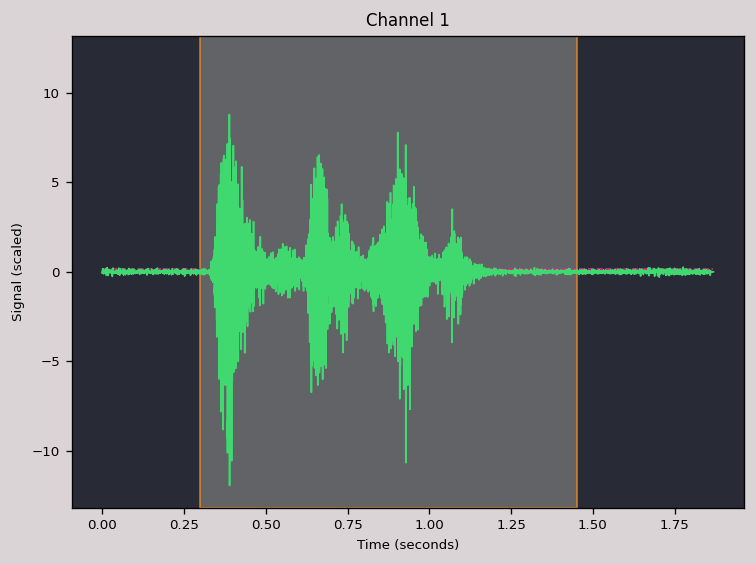

[AudioRegion(duration=1.150, sampling_rate=16000, sample_width=2, channels=1)]

In [9]:
sample_speech.splitp()

In [10]:
sample_speech = auditok.load('/content/drive/MyDrive/input/Crema/1001_DFA_HAP_XX.wav')

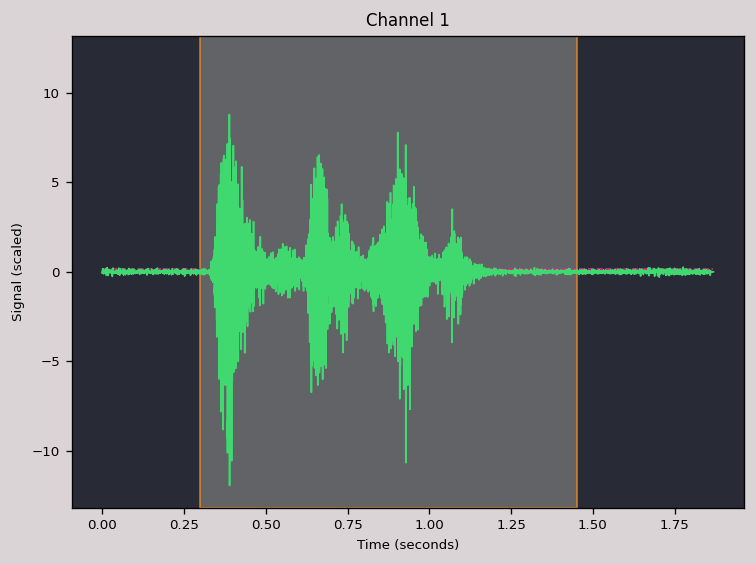

[AudioRegion(duration=1.150, sampling_rate=16000, sample_width=2, channels=1)]

In [11]:
sample_speech.splitp()

In [12]:
samples = np.asarray(sample_speech)
samples

array([-142., -107.,  -99., ...,   -4.,   -6.,   -7.])

In [13]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [14]:
def get_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    height = img._meshHeight
    img = img.get_array().reshape(img._meshWidth, img._meshHeight)
    img = np.array(img)
    return img

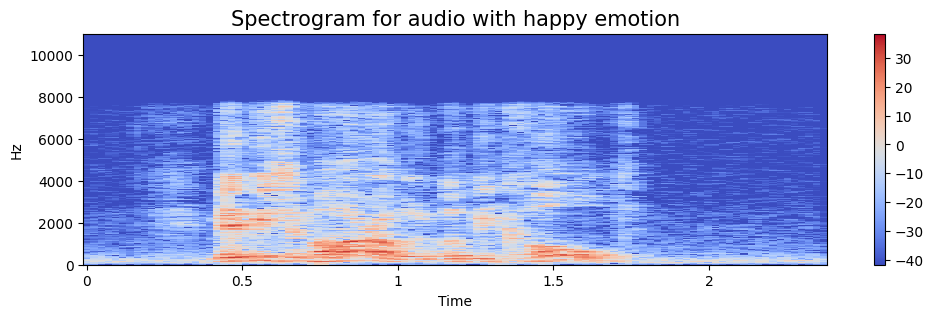

In [15]:
emotion='happy'
path = '/content/drive/MyDrive/input/Crema/1001_MTI_HAP_XX.wav'
data1, sampling_rate1 = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data1, sampling_rate1, emotion)
Audio(path)


In [16]:
from skimage.metrics import structural_similarity as ssim

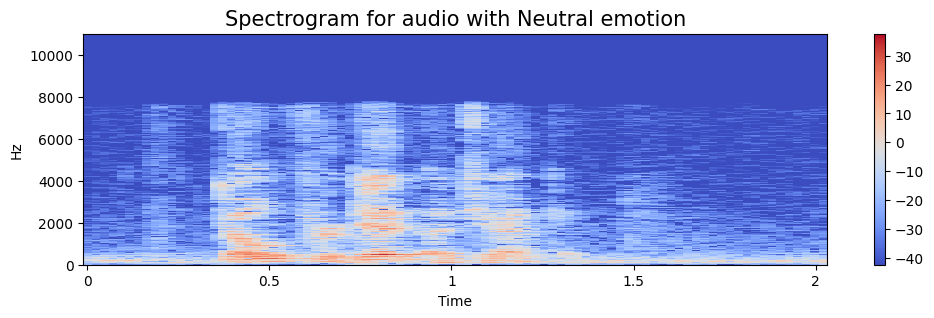

In [17]:
emotion='Neutral'
path = '/content/drive/MyDrive/input/Crema/1001_DFA_NEU_XX.wav'
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

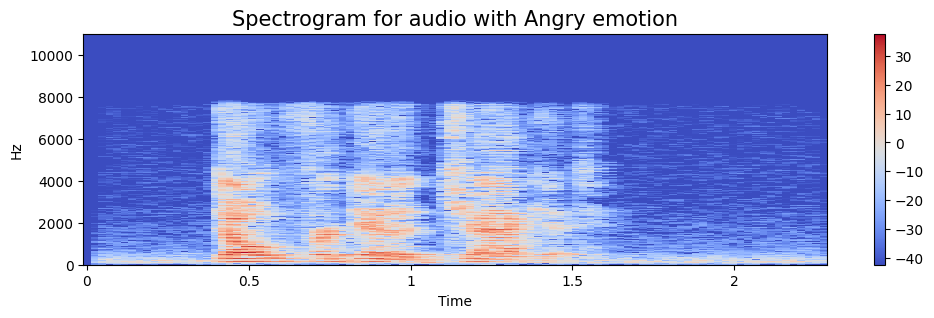

In [18]:
emotion='Angry'
path = '/content/drive/MyDrive/input/Crema/1001_DFA_ANG_XX.wav'
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

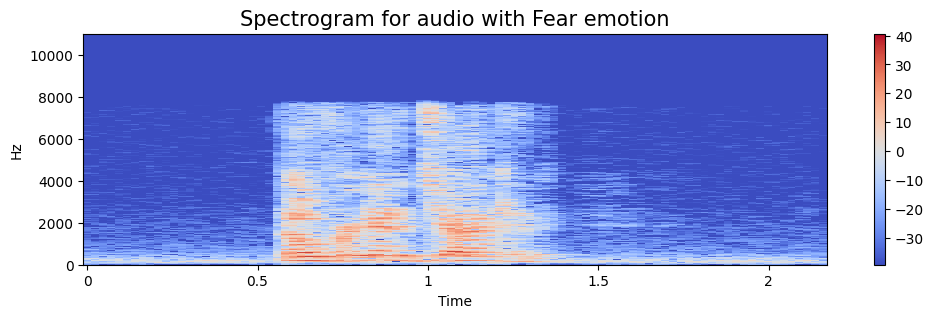

In [19]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_DFA_FEA_XX.wav'
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 37.9 MB/s eta 0:00:00


In [21]:
import speech_recognition as sr
sr.__version__
recog = sr.Recognizer()

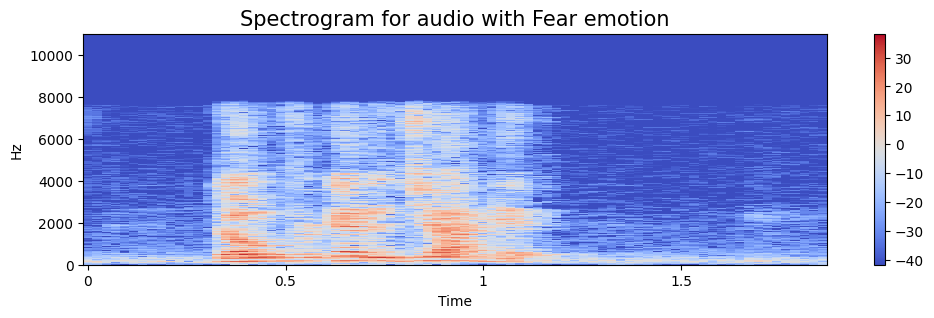

In [22]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_DFA_HAP_XX.wav'
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [23]:
speech = sr.AudioFile('/content/drive/MyDrive/input/test/audio/0116_036.wav')
with speech as source:
    audio1 = recog.record(source)
recog.recognize_google(audio1, language='hi-In')

'और अपने पेट को मां की स्वादिष्ट गरम गरम जलेबियां हड़प्पा'

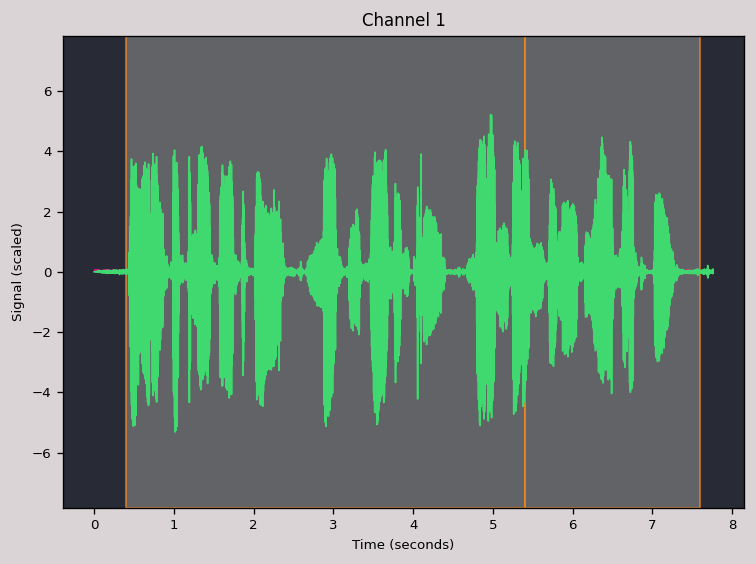

[AudioRegion(duration=5.000, sampling_rate=8000, sample_width=2, channels=1),
 AudioRegion(duration=2.200, sampling_rate=8000, sample_width=2, channels=1)]

In [24]:
sample_speech = auditok.load('/content/drive/MyDrive/input/test/audio/0116_036.wav')
sample_speech.splitp()

In [25]:
len(sample_speech)

62080

In [26]:
print(sample_speech.duration) # duration in seconds
print(sample_speech.sampling_rate) # alias `sr`
print(sample_speech.sample_width) # alias `sw`
print(sample_speech.channels) # alias `ch`

7.76
8000
2
1


In [27]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

sound_file = AudioSegment.from_wav('/content/drive/MyDrive/input/test/audio/0116_036.wav')
audio_chunks = split_on_silence(sound_file,
    # must be silent for at least half a second
    min_silence_len=100,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-16
)
for i, chunk in enumerate(audio_chunks):

    out_file = "chunk{0}.wav".format(i)
    print("exporting", out_file)
    chunk.export(out_file, format="wav")



exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
exporting chunk6.wav
exporting chunk7.wav
exporting chunk8.wav
exporting chunk9.wav
exporting chunk10.wav


In [28]:
import os

In [29]:
text_path= ['/content/drive/MyDrive/input/test/audio/0116_003.wav','/content/drive/MyDrive/input/test/audio/0116_008.wav','/content/drive/MyDrive/input/test/audio/0116_025.wav','/content/drive/MyDrive/input/test/audio/0136_003.wav']
text_list = []

In [30]:
lan = 'hi-IN'

In [31]:
for path in text_path:
    texts = ''
    audio_regions = auditok.split(path)

    for i, r in enumerate(audio_regions):
        print("Region {i}: {r.meta.start:.3f}s -- {r.meta.end:.3f}s".format(i=i, r=r))
        filename = r.save("region_{meta.start:.3f}-{meta.end:.3f}.wav")
        speech = sr.AudioFile(filename)
        print(speech)
        with speech as source:
            audio1 = recog.record(source)
        try:
            text = recog.recognize_google(audio1, language=lan)
            texts+= str(text)
            os.remove(filename)
        except:
            pass
    text_list.append(texts)

Region 0: 0.600s -- 5.600s
Region 1: 5.600s -- 6.900s
Region 0: 0.350s -- 1.750s
Region 1: 1.800s -- 3.050s
Region 2: 3.550s -- 4.950s
Region 3: 5.300s -- 5.960s
Region 0: 1.000s -- 5.850s
Region 0: 0.200s -- 5.200s
Region 1: 5.200s -- 6.780s


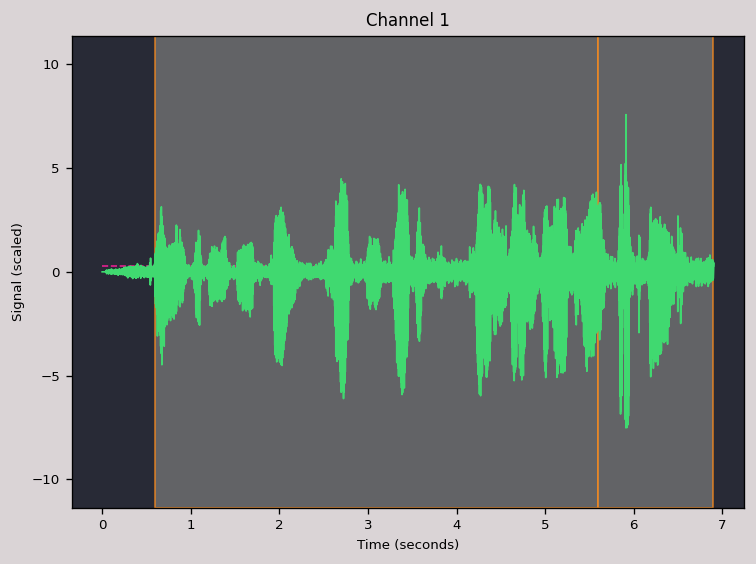

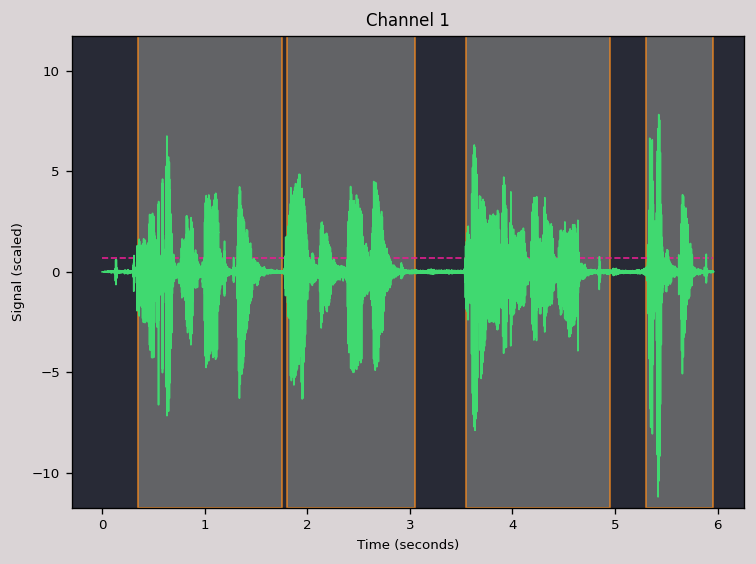

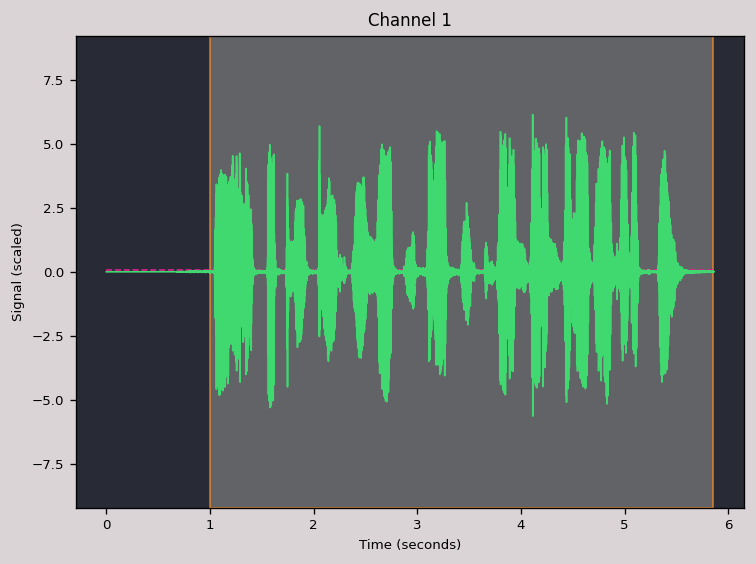

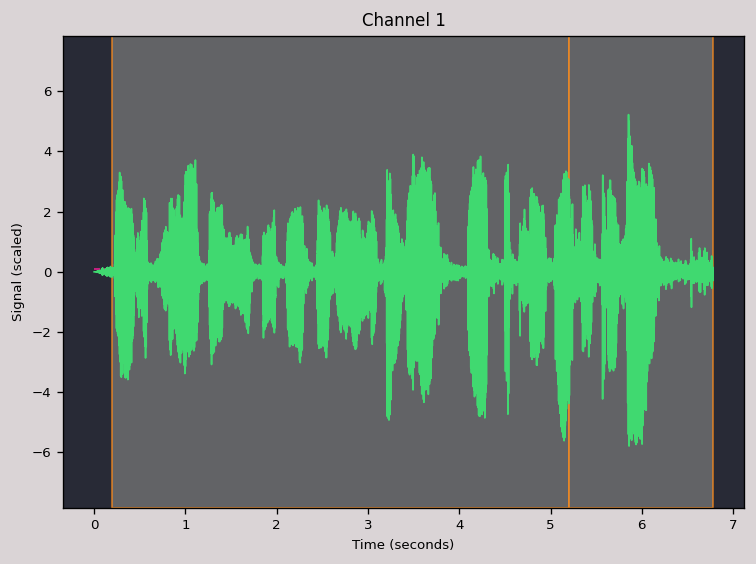

In [32]:
for path in text_path:
    sample_speech = auditok.load(path)
    sample_speech.splitp()

In [33]:
speech = sr.AudioFile(text_path[3])
with speech as source:
    audio1 = recog.record(source)
text = recog.recognize_google(audio1, language=lan)
print(text)

दो मछलियां सामने से तैरती हुई निकल गई एक पतली और दूसरी गोल


In [34]:
Audio(path)

In [35]:
pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-xphfyje7
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-xphfyje7
  Resolved https://github.com/huggingface/transformers to commit 0b192de1f353b0e04dad4813e02e2c672de077be
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.34.0.dev0-py3-none-any.whl size=7746762 sha256=a8c0306574f20d9c77d5ba07125006b1e4cded1b6f90eb2b6c504606d50bf20e
  Stored in directory: /tmp/pip-ephem-wheel-cache-qiauvun

In [36]:
from transformers import AutoModel,AutoTokenizer

In [37]:
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/input/modelf1')

Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.


In [38]:
text_list

['अपने पेट को माचिस स्वादिष्ट गरम गरम जाहड़प्पा',
 'अपने पेट कोमां की स्वादगरम गरम जलेबीहद',
 'और अपने पेट को मां की स्वादिष्ट गरम गरम जलेबी या हड़प्पा',
 'दो मछलियां सामने से तैरती हुई निकल गई एक पतलीदूसरी गोल']

In [39]:
!pip install torch

In [40]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import random
import tqdm

Spectral Analysis

In [41]:
import librosa

In [42]:
!pip install librosa

In [43]:
path = '/content/drive/MyDrive/input/Crema/1001_DFA_ANG_XX.wav'
data,sampling_rate = librosa.load(path)

Mel frequency cepstral coefficients (MFCC)

In [44]:
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
mfcc

array([[-6.20808838e+02, -5.45379822e+02, -4.91683746e+02, ...,
        -4.71647858e+02, -4.75757355e+02, -5.12116028e+02],
       [ 2.26856753e-01,  8.52582016e+01,  1.11604523e+02, ...,
         1.14039124e+02,  1.14149475e+02,  1.02011078e+02],
       [ 2.23987132e-01,  4.34561844e+01,  3.41577225e+01, ...,
         2.59717731e+01,  2.75286674e+01,  3.33677673e+01],
       ...,
       [-1.87311411e-01,  3.19000626e+00, -1.35732937e+00, ...,
        -2.91428089e+00, -2.21181130e+00, -3.15661907e+00],
       [-1.81110710e-01,  2.72370100e+00, -3.29154432e-01, ...,
        -7.02392721e+00, -2.64755559e+00,  2.47710466e+00],
       [-1.73475906e-01, -3.28368187e+00, -1.15716953e+01, ...,
         6.14603519e-01,  3.39931345e+00,  6.18980408e+00]], dtype=float32)

In [45]:
mean_mfcc = np.mean(mfcc.T, axis=0)
mean_mfcc

array([-3.41988922e+02,  1.20799950e+02, -9.83444881e+00,  3.96062279e+01,
       -2.23953176e+00,  1.38647718e+01, -1.88520412e+01, -2.98233700e+00,
       -1.11255236e+01, -2.10957718e+00, -1.16643095e+01, -1.97200942e+00,
       -3.12718129e+00, -1.40039406e+01,  8.41256523e+00, -1.32016773e+01,
       -6.43509007e+00, -4.52184677e+00, -1.47882116e+00, -9.10739231e+00,
       -5.78745651e+00, -5.25278425e+00, -8.01385498e+00, -2.19934130e+00,
       -5.20657730e+00,  2.17304397e+00, -5.47653675e+00, -4.99655098e-01,
       -2.82703447e+00, -1.37790489e+00, -1.80418301e+00, -1.95937753e+00,
       -2.45551556e-01, -3.70638204e+00, -3.27878547e+00, -6.54513168e+00,
       -2.73020148e+00, -5.09117270e+00, -1.66994929e+00, -3.69724774e+00],
      dtype=float32)

In [46]:
import itertools

In [47]:
import itertools

In [48]:
def core_lsf(lpcseq,rectify=True):
    rhs = [0] + lpcseq[::-1] + [1]
    P = []
    Q = []
    # Assuming constant coefficient is 1, which is required. Moreover z^{-p+1} does not exist on the lhs, thus appending 0
    lpcseq = [1] + lpcseq[:] + [0]
    for l,r in itertools.zip_longest(lpcseq,rhs):
        P.append(l + r)
        Q.append(l - r)
    p_roots = np.roots(P[::-1])
    q_roots = np.roots(Q[::-1])
    lsf_p = sorted(np.angle(p_roots))
    lsf_q = sorted(np.angle(q_roots))
    if rectify:
        return sorted(i for i in lsf_q + lsf_p if (i > 0))[:-1]
    else:
        return sorted(i for i in lsf_q + lsf_p)

Continous Wavelet Transform

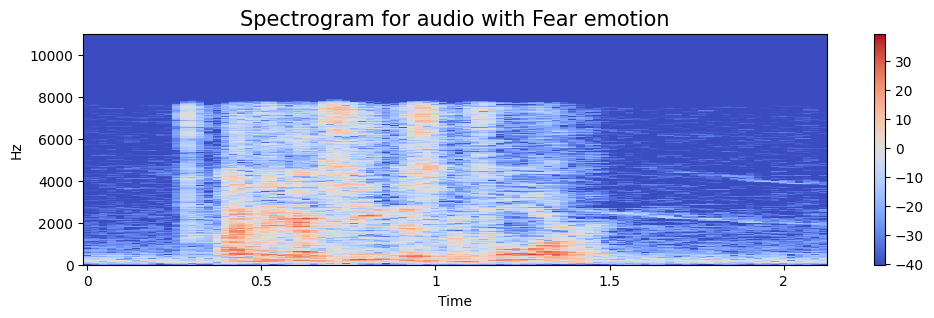

In [49]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, emotion)


In [50]:
def create_melspectrogram(data,sr,e):
    D = np.abs(librosa.stft(data))**2
    S = librosa.feature.melspectrogram(S=D, sr=sr)
    Xdb = librosa.amplitude_to_db(abs(S))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')


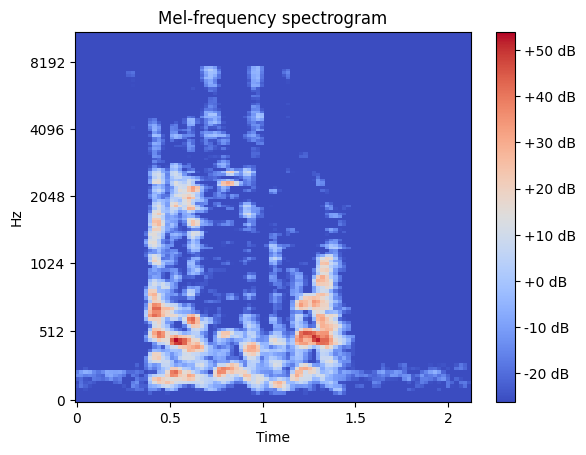

In [51]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
data, sampling_rate = librosa.load(path)
create_melspectrogram(data, sampling_rate, emotion)

Chroma stft

[Text(0.5, 1.0, 'Chromagram')]

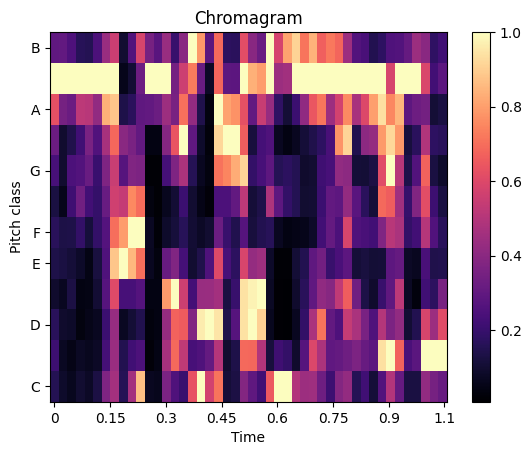

In [52]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
data, sr = librosa.load(path)
S = np.abs(librosa.stft(data, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

Constant-Q chromagram

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=736
  warnings.warn(


[Text(0.5, 1.0, 'Constant Q Chromagram')]

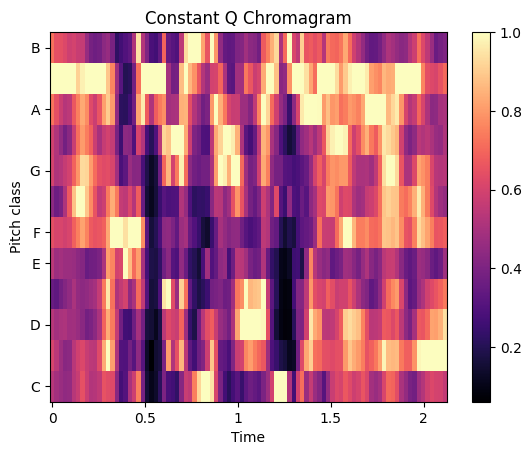

In [53]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
data, sr = librosa.load(path)
chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Constant Q Chromagram')

Chroma CENS

[Text(0.5, 1.0, 'Chroma CENS')]

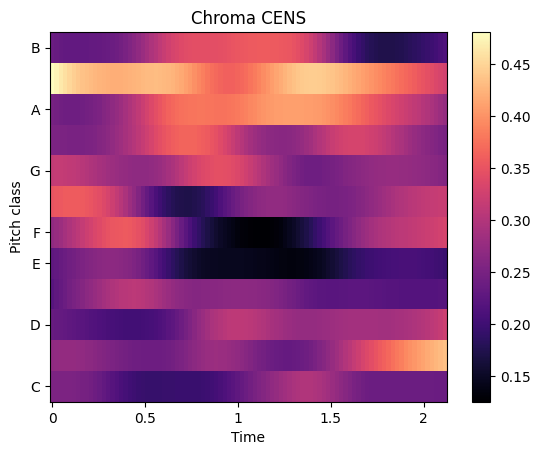

In [54]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chroma CENS')

RMS

[Text(0.5, 1.0, 'log Power spectrogram')]

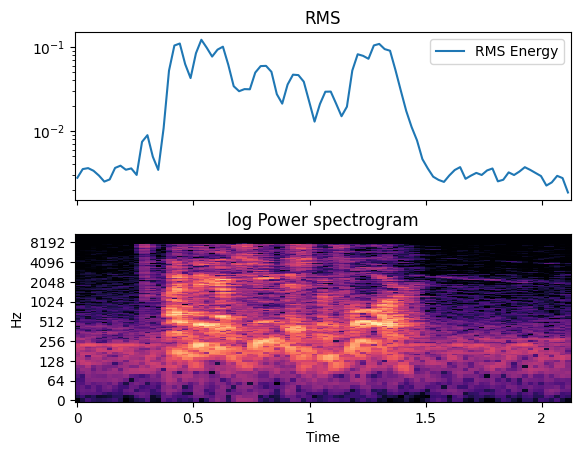

In [55]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].set(title='RMS')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Centroid

In [56]:
emotion='Fear'
path ='/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
centroid

array([[1073.1903695 , 1009.56879894, 1022.76621111, 1103.95425995,
        1090.15535256, 1219.01666249, 1160.54817487, 1050.42224842,
        1050.70427837, 1123.67556771, 1068.91790089, 2937.0588362 ,
        4545.9664889 , 4420.73539173, 3130.08170969, 2214.86025981,
        1566.30531658, 1678.2309667 , 1760.69301695, 1720.40425617,
        1680.11158731, 1650.66737428, 1790.65741631, 1782.78746024,
        1746.01216518, 1794.24122244, 1914.2443839 , 1848.73487091,
        1737.10979153, 2779.34605827, 3981.89749111, 4574.80011247,
        4171.42693638, 2897.32109413, 2343.76621034, 2366.7746307 ,
        2181.63555011, 1884.10239217, 2003.16416303, 2157.49686649,
        2633.35899377, 3553.43632978, 3975.45572617, 3866.54000838,
        2650.33874785, 1581.89976748, 1330.19039237, 1682.20768331,
        2958.56498672, 3637.49267007, 2482.35256735, 1109.91442903,
         903.02506744,  915.89727813,  956.10313542,  972.38999319,
         985.21220492,  996.04013591,  973.16511

Spectral Bandwidth

In [57]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw

array([[1849.78270046, 1713.28534274, 1686.17312261, 1748.35022863,
        1717.75609373, 1793.84200879, 1751.82087688, 1682.01738558,
        1674.639387  , 1760.47825679, 1734.7910227 , 2817.54490368,
        2435.07338647, 2464.9743379 , 2536.23934252, 2178.63559638,
        1546.90623039, 1451.92285661, 1458.4517698 , 1476.37589399,
        1572.02560737, 1790.5864721 , 1732.70446766, 1662.94456378,
        1609.89160261, 1552.38040365, 1520.94192987, 1495.54752691,
        1582.37349484, 2447.960864  , 2543.0374663 , 2372.41319061,
        2437.69773253, 2409.03155284, 2006.12468663, 1890.81476145,
        1861.37206141, 1809.6347888 , 1924.48346006, 1992.36812584,
        2349.65667834, 2606.07782182, 2589.26670214, 2472.9932893 ,
        2394.24952598, 1776.90460489, 1565.0846493 , 2113.27246084,
        2703.39046569, 2628.32554907, 2470.59481046, 1584.99822232,
        1260.32453989, 1249.7169312 , 1301.38086652, 1228.47713336,
        1168.53350043, 1123.34171392, 1086.87066

In [58]:
emotion='Fear'
path = '/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
contrast

array([[19.66113096, 16.42703057, 16.9442478 , 14.02779341, 18.30720153,
        18.10806322, 16.74338365, 15.74206988, 16.86026394, 24.25528305,
        19.32168508, 14.75422747, 14.56107444, 16.33334065, 20.0082765 ,
        19.74732501, 12.85630741, 18.79482273, 21.85588577, 26.91226764,
        27.61921768, 28.17719213, 20.50018675, 27.18508335, 23.41166494,
        27.6251302 , 25.37071736, 20.18223046, 23.0621054 , 22.94633245,
        17.36207469, 12.6214893 , 23.06910391, 13.92358808, 22.58040581,
        23.07596972, 23.60997616, 26.64811425, 15.96520194, 22.30386449,
        19.93663173, 21.68153771, 24.37480033, 21.32800769, 25.88620938,
        23.64645686, 25.90191724, 25.06054369, 25.30498999, 22.88641504,
        23.88267319, 26.85786998, 21.60022065, 21.06576467, 22.15549392,
        19.25545594, 22.08718091, 23.62794659, 25.75278646, 24.66703312,
        28.23554526, 22.97142656, 21.24737984, 21.9637065 , 19.24263923,
        21.70770065, 12.93760354, 11.6723657 , 16.7

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

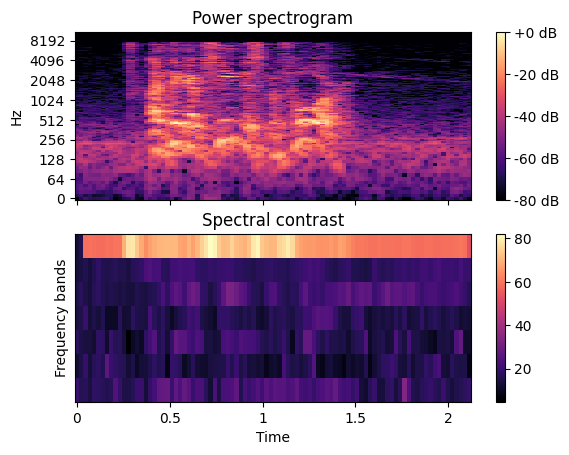

In [59]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

Spectral Flatness

In [60]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[1.43581338e-03, 7.85636308e-04, 8.97593927e-05, 1.21455334e-04,
        1.38703486e-04, 1.85907920e-04, 1.61379940e-04, 9.15689670e-05,
        8.67532945e-05, 1.12356312e-04, 9.94744478e-05, 7.50284817e-04,
        1.52925763e-03, 1.30372029e-03, 1.25518988e-03, 8.49777309e-04,
        1.51651620e-04, 6.85836421e-05, 5.23237504e-05, 4.64400582e-05,
        6.70628870e-05, 1.03332481e-04, 4.89313898e-05, 2.44159219e-05,
        2.16353492e-05, 3.54211588e-05, 4.62252538e-05, 3.52884999e-05,
        5.49255892e-05, 2.83164758e-04, 5.67095762e-04, 5.60002634e-04,
        5.06099896e-04, 1.34604459e-04, 6.24134482e-05, 3.89013512e-05,
        3.49685433e-05, 4.84651209e-05, 1.48459323e-04, 1.47907631e-04,
        2.03375996e-04, 3.03721870e-04, 3.70571419e-04, 5.83769695e-04,
        4.66367666e-04, 1.16092822e-04, 6.27060290e-05, 8.89647854e-05,
        2.85055110e-04, 7.60330295e-04, 3.00727668e-04, 1.99090264e-05,
        6.04532170e-06, 4.75411798e-06, 5.30685475e-06, 3.915029

Spectral roll off

In [61]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff

array([[7719.65332031, 7439.72167969, 7245.92285156, 7192.08984375,
        7202.85644531, 7245.92285156, 7235.15625   , 7192.08984375,
        7202.85644531, 7299.75585938, 7224.38964844, 7590.45410156,
        7622.75390625, 7622.75390625, 7579.6875    , 7525.85449219,
        7127.49023438, 6879.85839844, 6944.45800781, 7019.82421875,
        7181.32324219, 7450.48828125, 7472.02148438, 7353.58886719,
        7192.08984375, 7105.95703125, 7105.95703125, 7052.12402344,
        7288.98925781, 7601.22070312, 7655.05371094, 7676.58691406,
        7676.58691406, 7547.38769531, 7407.421875  , 7342.82226562,
        7342.82226562, 7353.58886719, 7461.25488281, 7482.78808594,
        7590.45410156, 7644.28710938, 7644.28710938, 7611.98730469,
        7579.6875    , 7353.58886719, 7310.52246094, 7515.08789062,
        7601.22070312, 7644.28710938, 7590.45410156, 7428.95507812,
        7041.35742188, 6998.29101562, 6976.7578125 , 6987.52441406,
        6890.625     , 6782.95898438, 6642.99316

Tonnetz

In [62]:
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
tonnetz

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=736
  warnings.warn(


array([[ 3.48361259e-03, -1.41960048e-02, -1.37820724e-02,
        -1.49761008e-02, -2.02911565e-02, -1.56469456e-02,
        -6.13417731e-03, -1.44033868e-02, -4.33458444e-02,
        -6.85648006e-02, -8.38782586e-02, -8.16407851e-02,
        -6.86486638e-02, -4.84164111e-02, -2.72667017e-02,
        -3.17932494e-02, -5.62636293e-02, -7.15826521e-02,
        -7.78558369e-02, -5.87072363e-02, -3.24050476e-02,
        -2.27860946e-02, -4.27406499e-02, -6.09842631e-02,
        -5.07332793e-02, -3.18083257e-02, -7.28299147e-02,
        -9.27222675e-02, -7.75546927e-02, -4.88827169e-02,
        -5.28779790e-02, -5.46291943e-02, -3.39966096e-02,
         7.96740348e-04,  2.61241889e-02,  7.22684770e-02,
         9.62488479e-02,  6.30734197e-02,  7.04744897e-02,
         3.73288877e-02,  1.06167708e-02, -6.06192568e-03,
         2.80321459e-03,  7.12245599e-03,  3.52017005e-02,
        -2.88689012e-03, -9.62152511e-03,  1.40875087e-02,
         1.75806230e-02,  1.21121032e-02,  4.27088780e-0

Zero Crossings

In [63]:
path ='/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
librosa.feature.zero_crossing_rate(y)

array([[0.01123047, 0.01855469, 0.02539062, 0.02734375, 0.03369141,
        0.03320312, 0.03222656, 0.03125   , 0.03271484, 0.03515625,
        0.03955078, 0.11132812, 0.15429688, 0.17333984, 0.18896484,
        0.12792969, 0.09472656, 0.08886719, 0.0859375 , 0.09179688,
        0.09179688, 0.0859375 , 0.07714844, 0.07080078, 0.07177734,
        0.08886719, 0.10351562, 0.10791016, 0.15039062, 0.22998047,
        0.33154297, 0.39160156, 0.34179688, 0.2734375 , 0.18945312,
        0.14160156, 0.15039062, 0.12646484, 0.11181641, 0.13232422,
        0.17138672, 0.22900391, 0.25097656, 0.22119141, 0.17285156,
        0.109375  , 0.06787109, 0.12109375, 0.18164062, 0.18994141,
        0.18847656, 0.12451172, 0.05810547, 0.04492188, 0.04541016,
        0.04638672, 0.05126953, 0.05517578, 0.06201172, 0.05957031,
        0.05957031, 0.06445312, 0.06494141, 0.07421875, 0.07666016,
        0.07421875, 0.06396484, 0.05859375, 0.05029297, 0.04345703,
        0.05761719, 0.05957031, 0.05664062, 0.06

Rythm Features

Tempogram

In [64]:
path ='/content/drive/MyDrive/input/Crema/1001_ITS_FEA_XX.wav'
y, sr = librosa.load(path)
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)

In [65]:
tempogram

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 6.76426204e-01,  6.77114971e-01,  6.77810978e-01, ...,
         7.84780466e-01,  7.86795461e-01,  7.88833233e-01],
       [ 3.49987019e-01,  3.51279339e-01,  3.52586687e-01, ...,
         5.61410671e-01,  5.65421067e-01,  5.69478525e-01],
       ...,
       [-3.48359611e-17,  4.51724329e-17,  2.20596772e-17, ...,
         6.37608138e-17, -2.67501732e-18,  1.98033790e-17],
       [-9.30104884e-18,  3.21380061e-17,  4.84310000e-18, ...,
         1.24371862e-16,  3.25140227e-18,  6.01568708e-17],
       [ 1.48412096e-17,  3.88117347e-17,  8.85316442e-18, ...,
         6.52186774e-17,  5.05445261e-18, -7.01929724e-19]])

In [66]:
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]
tempo

<ipython-input-66-a521aedb9559>:3: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,


117.45383522727273

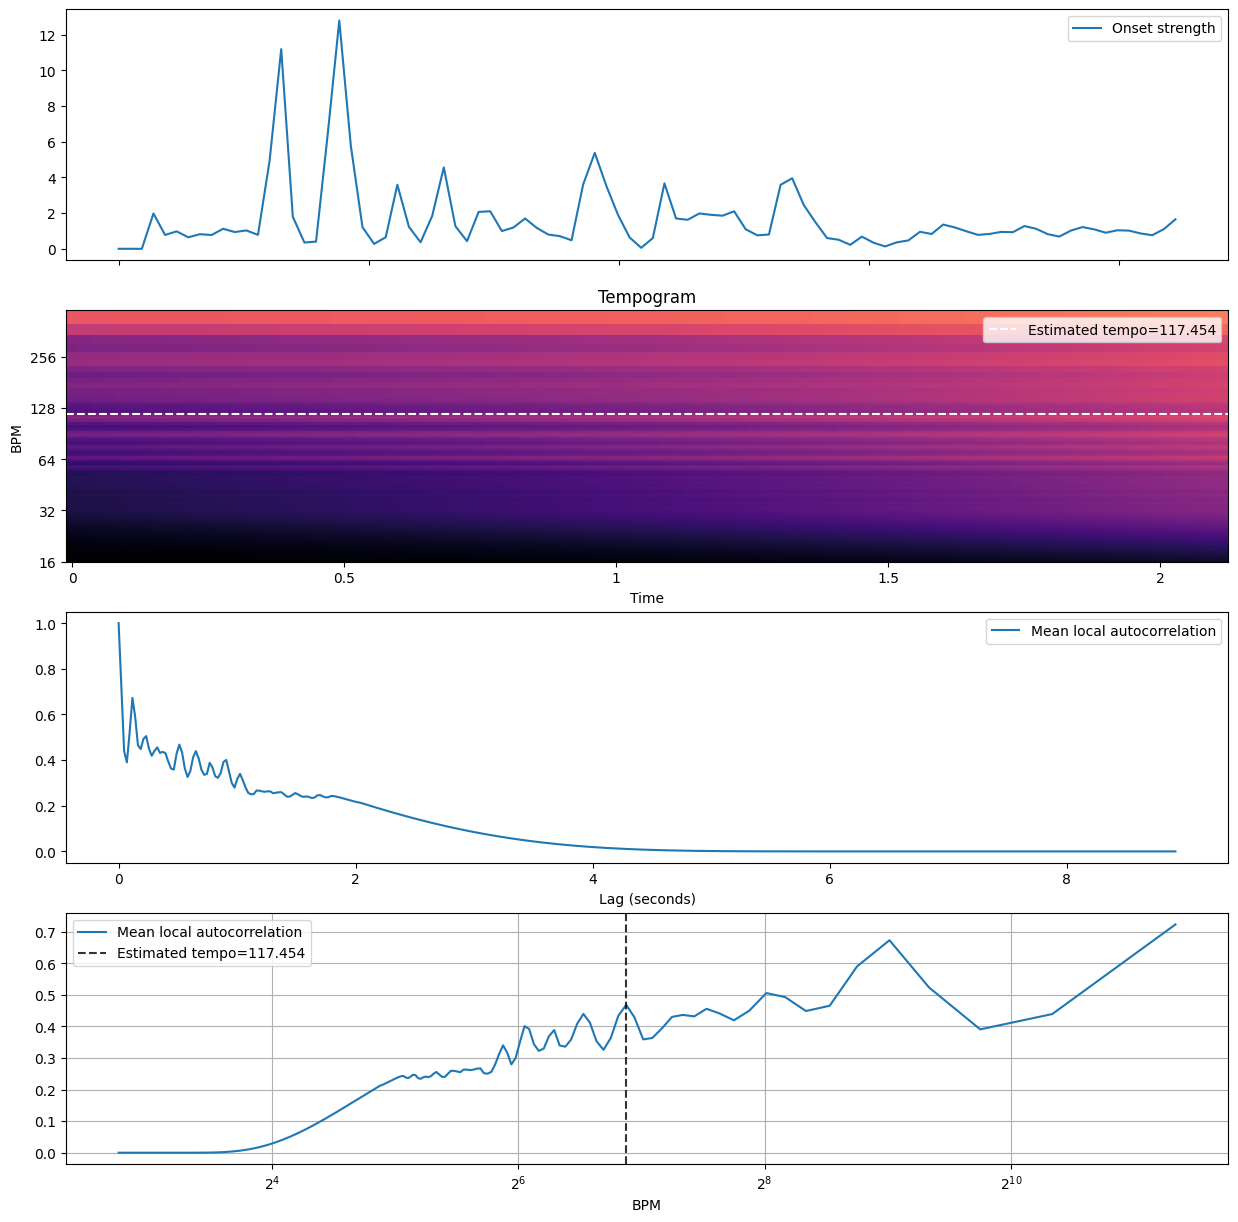

In [67]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='magma',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
#ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', base=2)
#ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

Delta Feature

In [68]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta

array([[ 1.9411296 ,  1.9411296 ,  1.9411296 , ..., -0.20564677,
        -0.20564677, -0.20564677],
       [-0.03537699, -0.03537699, -0.03537699, ..., -0.53078586,
        -0.53078586, -0.53078586],
       [-1.1877066 , -1.1877066 , -1.1877066 , ..., -0.8039059 ,
        -0.8039059 , -0.8039059 ],
       ...,
       [ 0.35055706,  0.35055706,  0.35055706, ...,  0.47286272,
         0.47286272,  0.47286272],
       [ 0.9073198 ,  0.9073198 ,  0.9073198 , ...,  0.89785033,
         0.89785033,  0.89785033],
       [-0.10247028, -0.10247028, -0.10247028, ..., -1.2477446 ,
        -1.2477446 , -1.2477446 ]], dtype=float32)

In [69]:
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
mfcc_delta2

array([[-1.270501  , -1.270501  , -1.270501  , ...,  0.72256815,
         0.72256815,  0.72256815],
       [-0.25008267, -0.25008267, -0.25008267, ...,  0.91392356,
         0.91392356,  0.91392356],
       [ 0.34745452,  0.34745452,  0.34745452, ..., -0.7685073 ,
        -0.7685073 , -0.7685073 ],
       ...,
       [-0.30559993, -0.30559993, -0.30559993, ...,  0.4872155 ,
         0.4872155 ,  0.4872155 ],
       [-0.35650462, -0.35650462, -0.35650462, ...,  0.60448015,
         0.60448015,  0.60448015],
       [-0.5072428 , -0.5072428 , -0.5072428 , ..., -0.20310453,
        -0.20310453, -0.20310453]], dtype=float32)

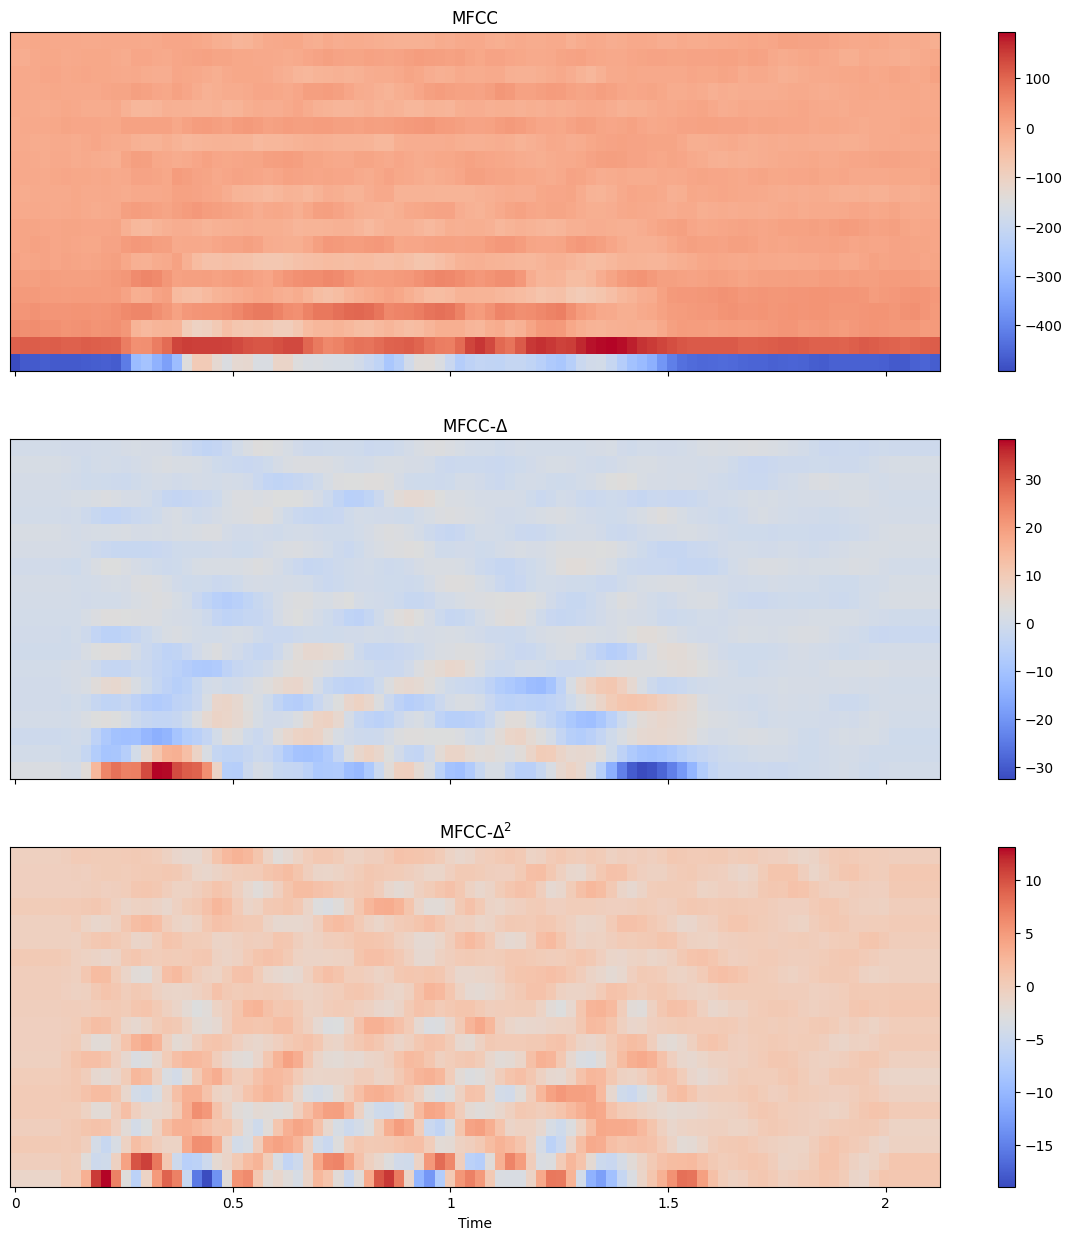

In [70]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True,figsize=(15,15))
img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

Data Preparation

In [71]:
data = {'Path':[],
         'language':[],
        'Emotion':[]}
Data = pd.DataFrame(data)
Data

,Path,language,Emotion


In [72]:
Emotion = {'SAD':  'Sad', 'ANG':'Angry','DIS' :  'Disgust', 'FEA' : 'Fear', 'HAP' : 'Happy', 'NEU': 'Neutral',
            'sa':  'Sad', 'a':'Angry','d' :  'Disgust', 'f' : 'Fear', 'h' : 'Happy', 'n': 'Neutral', 'su': 'Surprise',
            'Sad':  'Sad', 'angry':'Angry','disgust' :  'Disgust', 'Fear' : 'Fear', 'happy' : 'Happy', 'neutral': 'Neutral',
           'sad' : 'Sad', 'Pleasant':'Pleasant Surprise','fear':'Fear','pleasant':'Pleasant Surprise',
            '04':  'Sad', '05':'Angry','07' :  'Disgust', '06' : 'Fear', '03' : 'Happy', '01': 'Neutral', '02':'Calm','08' : 'Surprise',
            'T':  'Sad', 'W':'Angry','E' :  'Disgust', 'A' : 'Fear', 'F' : 'Happy', 'N': 'Neutral','L':'Boredom',
          'dis' : 'Disgust', 'gio':'Happy', 'pau' : 'Fear', 'rab' : 'Anger' , 'tri':'Sad','sor':'Surprise', 'neu' : 'Neutral'}

In [73]:
directory = '/content/drive/MyDrive/input/Crema'
lan = 'en-US'
for filename in os.listdir(directory):
    emotion = filename.split('_')[2]
    f = os.path.join(directory, filename)
    Data.loc[len(Data.index)] = [f, lan, Emotion[emotion]]

In [74]:
Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/Crema/1079_TSI_FE...,en-US,Fear
1,/content/drive/MyDrive/input/Crema/1079_WSI_NE...,en-US,Neutral
2,/content/drive/MyDrive/input/Crema/1079_TSI_DI...,en-US,Disgust
3,/content/drive/MyDrive/input/Crema/1079_TSI_NE...,en-US,Neutral
4,/content/drive/MyDrive/input/Crema/1079_WSI_SA...,en-US,Sad
...,...,...,...
7487,/content/drive/MyDrive/input/Crema/1006_IWL_NE...,en-US,Neutral
7488,/content/drive/MyDrive/input/Crema/1006_TIE_AN...,en-US,Angry
7489,/content/drive/MyDrive/input/Crema/1006_TSI_FE...,en-US,Fear
7490,/content/drive/MyDrive/input/Crema/1006_IWW_FE...,en-US,Fear


In [75]:
directory = '/content/drive/MyDrive/input/Savee'
lan = 'en-US'
for filename in os.listdir(directory):
    emotion = str(filename.split('_')[1])[0]
    if emotion == 's':
        emotion += str(filename.split('_')[1])[1]
    f = os.path.join(directory, filename)
    Data.loc[len(Data.index)] = [f, lan, Emotion[emotion]]

In [76]:
Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/Crema/1079_TSI_FE...,en-US,Fear
1,/content/drive/MyDrive/input/Crema/1079_WSI_NE...,en-US,Neutral
2,/content/drive/MyDrive/input/Crema/1079_TSI_DI...,en-US,Disgust
3,/content/drive/MyDrive/input/Crema/1079_TSI_NE...,en-US,Neutral
4,/content/drive/MyDrive/input/Crema/1079_WSI_SA...,en-US,Sad
...,...,...,...
7967,/content/drive/MyDrive/input/Savee/KL_su13.wav,en-US,Surprise
7968,/content/drive/MyDrive/input/Savee/KL_su11.wav,en-US,Surprise
7969,/content/drive/MyDrive/input/Savee/KL_su12.wav,en-US,Surprise
7970,/content/drive/MyDrive/input/Savee/KL_su14.wav,en-US,Surprise


In [77]:
directory = '/content/drive/MyDrive/input/Tess'
lan = 'en-US'
for sub_directory in os.listdir(directory):
    emotion = sub_directory.split('_')[1]
    direc = os.path.join(directory,sub_directory)
    for file in os.listdir(direc):
        f = os.path.join(direc,file)
        Data.loc[len(Data.index)] = [f, lan, Emotion[emotion]]

In [78]:
Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/Crema/1079_TSI_FE...,en-US,Fear
1,/content/drive/MyDrive/input/Crema/1079_WSI_NE...,en-US,Neutral
2,/content/drive/MyDrive/input/Crema/1079_TSI_DI...,en-US,Disgust
3,/content/drive/MyDrive/input/Crema/1079_TSI_NE...,en-US,Neutral
4,/content/drive/MyDrive/input/Crema/1079_WSI_SA...,en-US,Sad
...,...,...,...
10767,/content/drive/MyDrive/input/Tess/OAF_angry/OA...,en-US,Angry
10768,/content/drive/MyDrive/input/Tess/OAF_angry/OA...,en-US,Angry
10769,/content/drive/MyDrive/input/Tess/OAF_angry/OA...,en-US,Angry
10770,/content/drive/MyDrive/input/Tess/OAF_angry/OA...,en-US,Angry


In [79]:
directory = '/content/drive/MyDrive/input/Ravdess/audio_speech_actors_01-24'
lan = 'en-US'
for sub_directory in os.listdir(directory):
    direc = os.path.join(directory,sub_directory)
    for file in os.listdir(direc):
        emotion = file.split('-')[2]
        f = os.path.join(direc,file)
        Data.loc[len(Data.index)] = [f, lan, Emotion[emotion]]

In [80]:
Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/Crema/1079_TSI_FE...,en-US,Fear
1,/content/drive/MyDrive/input/Crema/1079_WSI_NE...,en-US,Neutral
2,/content/drive/MyDrive/input/Crema/1079_TSI_DI...,en-US,Disgust
3,/content/drive/MyDrive/input/Crema/1079_TSI_NE...,en-US,Neutral
4,/content/drive/MyDrive/input/Crema/1079_WSI_SA...,en-US,Sad
...,...,...,...
12207,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise
12208,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Disgust
12209,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise
12210,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise


In [81]:
data = {'Path':[],
         'language':[],
        'Emotion':[]}
Foreign_Data = pd.DataFrame(data)
Foreign_Data

,Path,language,Emotion


In [82]:
directory = '/content/drive/MyDrive/input/EMOVO'
lan = 'it-IT'
for sub_directory in os.listdir(directory):
    direc = os.path.join(directory,sub_directory)
    if sub_directory == 'documents':
        pass
    else:
        for file in os.listdir(direc):
            emotion = file.split('-')[0]
            f = os.path.join(direc,file)
            Foreign_Data.loc[len(Foreign_Data.index)] = [f, lan, Emotion[emotion]]

In [83]:
Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/Crema/1079_TSI_FE...,en-US,Fear
1,/content/drive/MyDrive/input/Crema/1079_WSI_NE...,en-US,Neutral
2,/content/drive/MyDrive/input/Crema/1079_TSI_DI...,en-US,Disgust
3,/content/drive/MyDrive/input/Crema/1079_TSI_NE...,en-US,Neutral
4,/content/drive/MyDrive/input/Crema/1079_WSI_SA...,en-US,Sad
...,...,...,...
12207,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise
12208,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Disgust
12209,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise
12210,/content/drive/MyDrive/input/Ravdess/audio_spe...,en-US,Surprise


In [84]:
Foreign_Data

,Path,language,Emotion
0,/content/drive/MyDrive/input/EMOVO/m3/dis-m3-b...,it-IT,Disgust
1,/content/drive/MyDrive/input/EMOVO/m3/dis-m3-b...,it-IT,Disgust
2,/content/drive/MyDrive/input/EMOVO/m3/dis-m3-b...,it-IT,Disgust
3,/content/drive/MyDrive/input/EMOVO/m3/dis-m3-d...,it-IT,Disgust
4,/content/drive/MyDrive/input/EMOVO/m3/dis-m3-l...,it-IT,Disgust
...,...,...,...
593,/content/drive/MyDrive/input/EMOVO/f2/tri-f2-n...,it-IT,Sad
594,/content/drive/MyDrive/input/EMOVO/f2/tri-f2-n...,it-IT,Sad
595,/content/drive/MyDrive/input/EMOVO/f2/tri-f2-n...,it-IT,Sad
596,/content/drive/MyDrive/input/EMOVO/f2/tri-f2-n...,it-IT,Sad


In [85]:
import speech_recognition as sr
sr.__version__
recog = sr.Recognizer()

In [86]:
text_list = []
text_path = Data['Path'].tolist()
lan = Data['language'].tolist()
for it in range(len(text_path)):
    try:
        texts = ''
        audio_regions = auditok.split(text_path[it])

        for i, r in enumerate(audio_regions):
            #print("Region {i}: {r.meta.start:.3f}s -- {r.meta.end:.3f}s".format(i=i, r=r))
            filename = r.save("region_{meta.start:.3f}-{meta.end:.3f}.wav")
            speech = sr.AudioFile(filename)
            #print(speech)
            with speech as source:
                audio1 = recog.record(source)
            try:
                text = recog.recognize_google(audio1, language=lan[it])
                texts+= str(text)
                os.remove(filename)

            except:
                pass
        text_list.append(texts)
    except:
        text_Empty = " "
        text_list.append(text_Empty)
    if it%1000 == 0:
        print(it)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [87]:
Data['text'] = text_list

In [88]:
Data.to_csv('Data.csv',index=False)

In [89]:
Foreign_Data.to_csv('ForeignData.csv',index=False)